## [1] Import & Data Check

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

### data_description
* MSSubClass : 건물 등급
* MSZoning : 일반 구역 분류 (농업, 상업, 주거 등)
* LotFrontage : 마당? 규모
* LotArea : 주택 바닥 규모
* Street : (자갈, 포장)
* Alley : 골목 (자갈, 포장, X)
* LotShape : 주택 모양 (규칙 - 불규칙)
* LandContour : 평탄 정도
* Utilities : (전기, 가스, 수도 등)
* LotConfig : 주택 주변 (골목 등)
* LandSlope : 경사
* Neighborhood : Ames시 내의 물리적 위치
* Condition1 : 주요 도로 또는 철도와의 근접성
* Condition2 : 위와 동일 (둘 이상 있는 경우)
* BldgType : 주거 유형 (단독 주택, 타운 하우스 등)
* HouseStyle : 층 수?
* OverallQual : 전체 재료 및 마감 품질
* OverallCond : 전체 상태 등급
* YearBuilt : 건설 연도
* YearRemodAdd : 리모델링 연도
* RoofStyle : 지붕 모양 (외쪽, 박공, 평 등)
* RoofMatl : 지붕 재료
* Exterior1st : 집 외부 커버
* Exterior2nd : 위와 동일 (둘 이상 있는 경우)
* MasVnrType : 벽돌 유형
* MasVnrArea : 평당 벽돌 면적
* ExterQual : 외장재 품질
* ExterCond : 외장재 상태 
* Foundation : 기초 유형
* BsmtQual : 지하 높이
* BsmtCond : 지하실 상태
* BsmtExposure : 정원 수준의 지하 벽
* BsmtFinType1 : 지하실1 마감 품질
* BsmtFinSF1 : 지하실1 면적 규모
* BsmtFinType2 : 지하실2 마감 품질
* BsmtFinSF2 : 지하실2 면적 규모
* BsmtUnfSF : 미완성된 지하실 면적
* TotlaBsmtSF : 지하 총 면적 규모
* Heating : 난방 유형
* HeatingQC : 난방 품질 및 상태 
* CentralAir : 중앙 에어컨
* Electrical : 전기 시스템
* 1stFlrSF : 1층 면적
* 2ndFlrSF : 2층 면적
* LowQualFinSF : 전층 저품질 마감 면적
* GrLivArea : 지상 거실 면적
* BsmtFullBath : 지하 전체 욕실
* BsmtHalfBath : 지하 반 욕실
* FullBath : 등급 이상 전체 욕실
* HalfBath : 등급 이상 반 욕실
* Bedroom : 지상 침실 수
* Kitchen : 주방 수
* KitchenQual : 주방 품질
* TotRmsAbcGrd : 화장실 제외한 전체 방 수 
* Functional : 기능 등급
* Fireplaces : 벽난로 수
* FireplaceQu : 벽난로 품질
* GarageType : 차고 위치
* GarageYrBlt : 차고 건설 연도
* GarageFinsh : 차고 마감
* GarageCars : 수용가능한 차 대수
* GarageArea : 차고 면적
* GarageQual : 차고 품질
* GarageCond : 차고 상태
* PavedDrive : 포장 진입로
* WoodDeckSF : 목재 데크 면적
* OpenPorchSF : 열린 현관 영역
* EnclosedPorch : 닫힌 현관 영역
* 3SsnPorch : 3계절 현관 영역
* ScreenPorch : 스크린 현관 영역
* PoolArea : 수영장 면적
* PoolQC : 수영장 품질
* Fence : 울타리 품질
* MiscFeature : 기타 (엘베, 테니스 코트 등)
* MiscVal : 기타의 가치
* MoSold : 판매 달
* YrSold : 판매 연도
* SaleType : 판매 유형
* SaleCondition : 판매 조건

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/house price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/house price/test.csv')

In [12]:
print(data.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
num_feats = data.dtypes[data.dtypes != 'object'].index
cat_feats = data.dtypes[data.dtypes == 'object'].index

print('수치형 변수: ', len(num_feats))
print('명목형 변수: ', len(cat_feats))

수치형 변수:  38
명목형 변수:  43


### 이상치 탐색 및 제거

* y값 포함하지 않는 수치형 변수

In [15]:
out = []

for i in num_feats.drop(['SalePrice']):
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    outlier = data[(data[i] < (Q1 - 1.5 * IQR)) | (data[i] > (Q3 + 1.5 * IQR))].index
    out.extend(outlier)

In [16]:
len(out)

1596

* 중복을 제거한 개수

In [17]:
len(list(set(out)))

886

* 중복이 3번 이상인 것만 제거

In [22]:
multi_out = list(k for k, v in Counter(out).items() if v > 2)

In [23]:
len(multi_out)

155

In [24]:
data.loc[multi_out]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,...,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,649,Unf,0,321,970,GasA,...,Y,SBrkr,983,756,0,1739,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1999.0,Fin,2,480,TA,TA,Y,115,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,...,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,...,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,5,7,1940,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,ALQ,351,Rec,181,112,644,GasA,...,Y,SBrkr,808,547,0,1355,1,0,2,0,4,2,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,...,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,...,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,NaN,Detchd,1980.0,Unf,2,576,TA,TA,Y,264,56,0,0,0,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,Duplex,2Story,5,5,1960,1960,Gable,CompShg,MetalSd,MetalSd,BrkFace,361.0,TA,TA,CBlock,TA,TA,No,Rec,443,Unf,0,662,1105,GasA,...,Y,FuseA,1105,1169,0,2274,0,0,2,0,5,2,TA,12,Typ,0,NaN,Detchd,1960.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,TA,TA,

In [25]:
data = data.drop(multi_out, axis = 0).reset_index(drop = True)
data.shape

(1305, 81)

### 결측치 확인

* 모든 행에 결측값 하나 이상 가지고 있음
* 아마 어떤 열이 문제가 있을 것으로 추측됨

In [26]:
(data.isna().sum(axis = 1) > 0).sum()

1305

In [27]:
nper = []
for i in data.columns:
    per = data[i].isnull().sum() / data[i].shape[0]
    nper.append((i, per))

In [28]:
for i in range(len(nper)):
    if nper[i][1] > 0:
        print(nper[i])

('LotFrontage', 0.1731800766283525)
('Alley', 0.9425287356321839)
('MasVnrType', 0.0053639846743295016)
('MasVnrArea', 0.0053639846743295016)
('BsmtQual', 0.022988505747126436)
('BsmtCond', 0.022988505747126436)
('BsmtExposure', 0.02375478927203065)
('BsmtFinType1', 0.022988505747126436)
('BsmtFinType2', 0.02375478927203065)
('Electrical', 0.0007662835249042146)
('FireplaceQu', 0.48582375478927203)
('GarageType', 0.04827586206896552)
('GarageYrBlt', 0.04827586206896552)
('GarageFinish', 0.04827586206896552)
('GarageQual', 0.04827586206896552)
('GarageCond', 0.04827586206896552)
('PoolQC', 0.9984674329501916)
('Fence', 0.8068965517241379)
('MiscFeature', 0.9708812260536398)


* test 데이터도 똑같이 진행

In [69]:
for i in test.columns:
    per = test[i].isnull().sum() / data[i].shape[0]
    if per > 0:
        print(i, per)

MSZoning 0.0030651340996168583
LotFrontage 0.1739463601532567
Alley 1.036015325670498
Utilities 0.0015325670498084292
Exterior1st 0.0007662835249042146
Exterior2nd 0.0007662835249042146
MasVnrType 0.012260536398467433
MasVnrArea 0.011494252873563218
BsmtQual 0.03371647509578544
BsmtCond 0.034482758620689655
BsmtExposure 0.03371647509578544
BsmtFinType1 0.03218390804597701
BsmtFinSF1 0.0007662835249042146
BsmtFinType2 0.03218390804597701
BsmtFinSF2 0.0007662835249042146
BsmtUnfSF 0.0007662835249042146
TotalBsmtSF 0.0007662835249042146
BsmtFullBath 0.0015325670498084292
BsmtHalfBath 0.0015325670498084292
KitchenQual 0.0007662835249042146
Functional 0.0015325670498084292
FireplaceQu 0.5593869731800766
GarageType 0.05823754789272031
GarageYrBlt 0.059770114942528735
GarageFinish 0.059770114942528735
GarageCars 0.0007662835249042146
GarageArea 0.0007662835249042146
GarageQual 0.059770114942528735
GarageCond 0.059770114942528735
PoolQC 1.1157088122605363
Fence 0.8957854406130268
MiscFeature 1

* 결측값이 50% 이상인 열 제거하려 했으나, 데이터를 상세히 보니,<br>
수영장 같은 것은 갖고 있지 않기 때문에 None값으로 추후 처리할 것임

In [73]:
# data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
# data.shape

(1305, 77)

### 비대칭도 확인

* Skewness (비대칭도) 
> a = 0 정규분포, a < 0 오른쪽 치우침, a > 0 왼쪽 치우침
* Kurtosis (첨도)
> 확률분포의 꼬리가 두꺼운 정도

In [29]:
for i in num_feats:
    sk = data[i].skew()
    ku = data[i].kurt()
    print(i, sk, ku)

Id 0.006975854761464291 -1.1950627442120116
MSSubClass 1.3887652414954836 1.6790698729336664
LotFrontage 1.7735452222642503 15.951835551630738
LotArea 8.269944596542196 134.54191556293347
OverallQual 0.11026982846196835 -0.08986146452034749
OverallCond 0.7371562958124575 1.2222597843683611
YearBuilt -0.5586359933709251 -0.6550420312819627
YearRemodAdd -0.5166905889880345 -1.2806156607949133
MasVnrArea 2.688994474846696 11.787138356776289
BsmtFinSF1 0.6240644531244355 -0.5498758099277299
BsmtFinSF2 4.979862990318307 28.116555240415476
BsmtUnfSF 0.8525000674414943 0.25640251598474206
TotalBsmtSF 0.2381570405713692 1.156650059969793
1stFlrSF 0.6470650557942143 -0.1329258040843051
2ndFlrSF 0.7611868874099746 -0.8962481417202905
LowQualFinSF 12.65071675710978 167.62348161217702
GrLivArea 0.586693914140557 0.2221713021329368
BsmtFullBath 0.5628572199465419 -0.9718389099632723
BsmtHalfBath 4.947437620515348 25.167730218331386
FullBath -0.07796140388991672 -1.3171346730572104
HalfBath 0.694876

## [2] EDA

### 수치형 변수 탐색

In [30]:
data[num_feats].corr().abs().drop('SalePrice')['SalePrice'].nlargest(10)

OverallQual     0.813254
GrLivArea       0.726666
GarageCars      0.662783
GarageArea      0.648318
TotalBsmtSF     0.625225
YearBuilt       0.607956
1stFlrSF        0.594167
FullBath        0.576018
YearRemodAdd    0.554273
GarageYrBlt     0.543862
Name: SalePrice, dtype: float64

* 다중 공선성 (MultiColarisity)
> 독립변수들 간에 강한 상관관계 <br>


해결방법 <br>
1. 상관관계가 높은 독립변수 중 하나 혹은 일부를 제거한다. <br>
2. 변수를 변형시키거나 새로운 관측치를 이용한다. <br>
3. 자료를 수집하는 현장의 상황을 보아 상관관계의 이유를 파악하여 해결한다. <br>
4. 주성분 분석을 이용한 diagonal matrix의 형태로 공선성을 없애준다.

* GargaeCars 와 GarageArea
* 1stFlrSF 와 TotalBsmtSF
* GarageYrBlt 와 YearBuilt

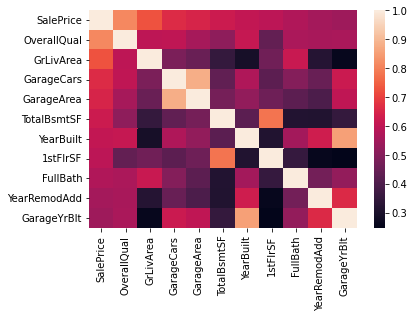

In [31]:
cols = data[num_feats].corr().abs().nlargest(11, 'SalePrice')['SalePrice'].index

sns.heatmap(data[cols].corr())

* 다중공선성을 보이는 변수 중 SalePrice와 연관이 덜 한 변수 제거

In [32]:
cols = cols.drop(['GarageArea', '1stFlrSF', 'GarageYrBlt'])
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'YearBuilt', 'FullBath', 'YearRemodAdd'],
      dtype='object')

* 'TotalBsmtSF'이 'GrLiveArea'과 같을 수 있지만, 더 크진 않기 때문에 보여지는 특징
* 'SalePrice' 와 'YearBuilt' (전년도 대비 주택 가격 상승의 가속을 의미)

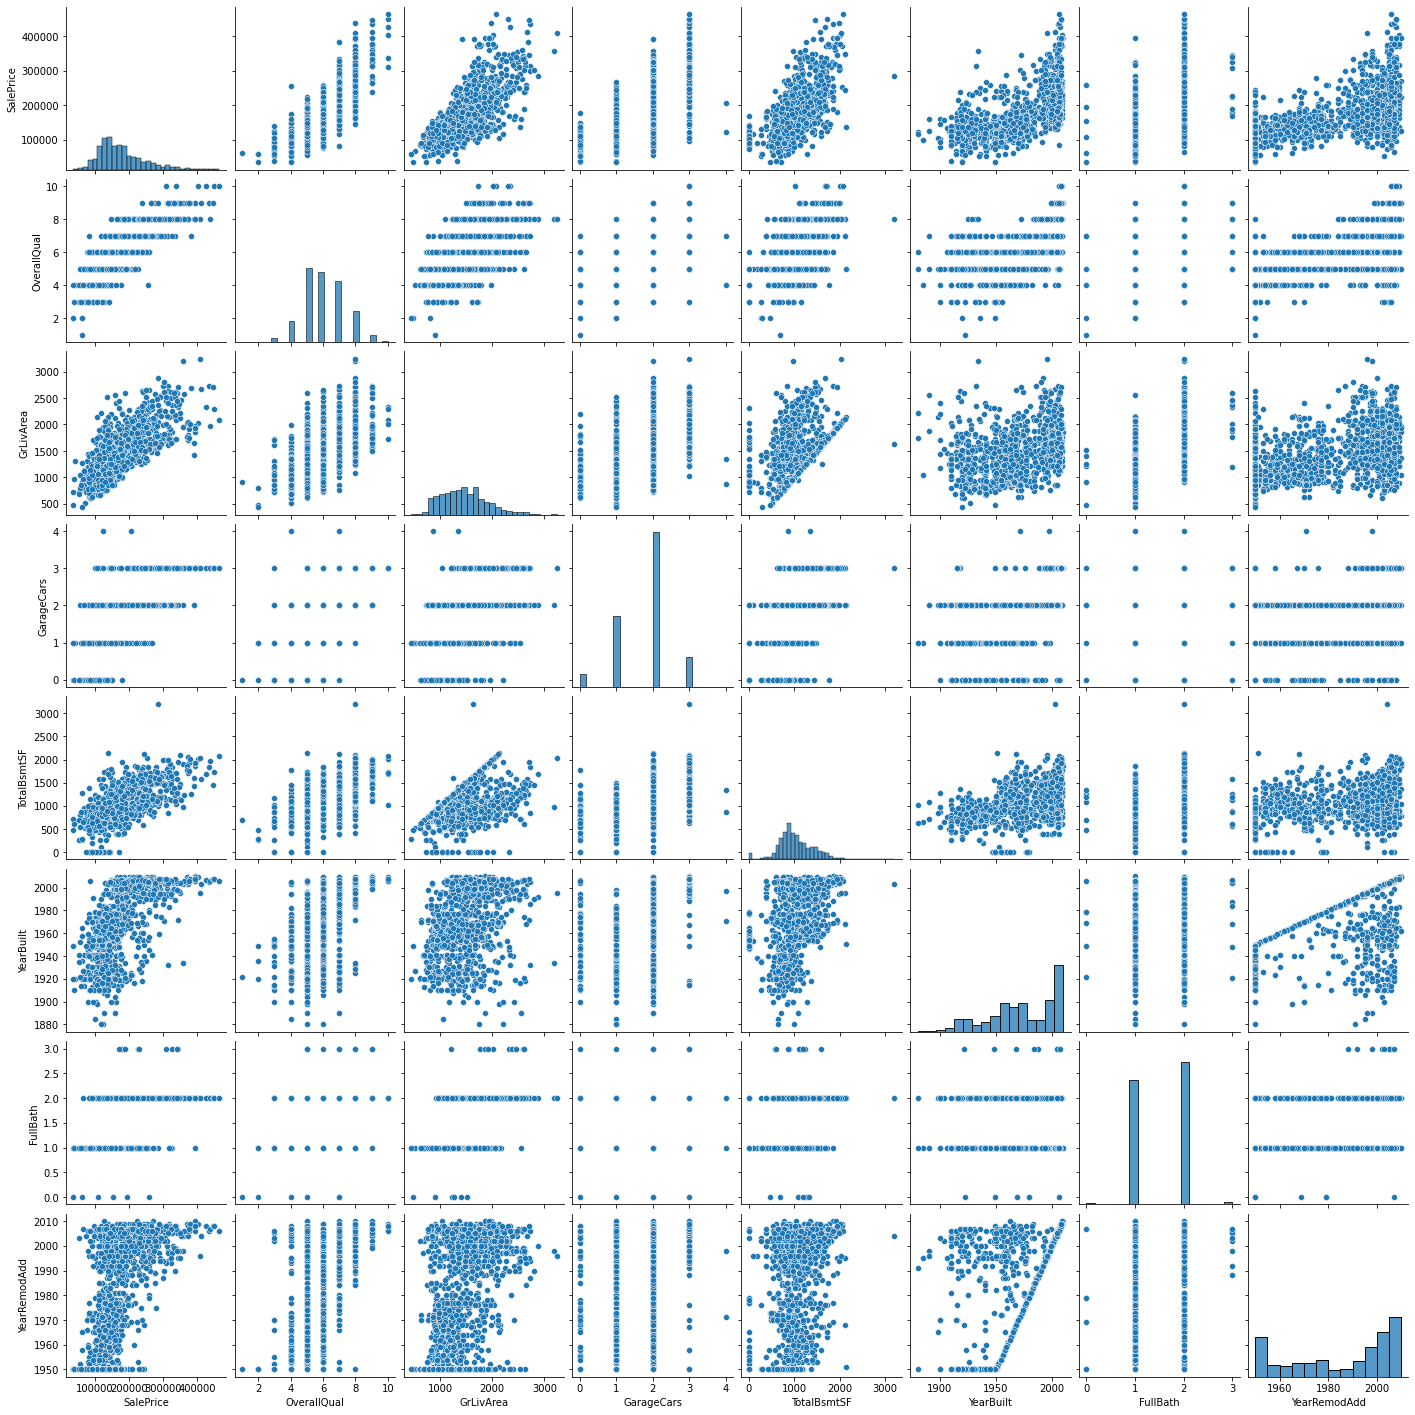

In [33]:
sns.pairplot(data[cols])

* OverallQual, GarageCars, FullBath 범주형 데이터 특성

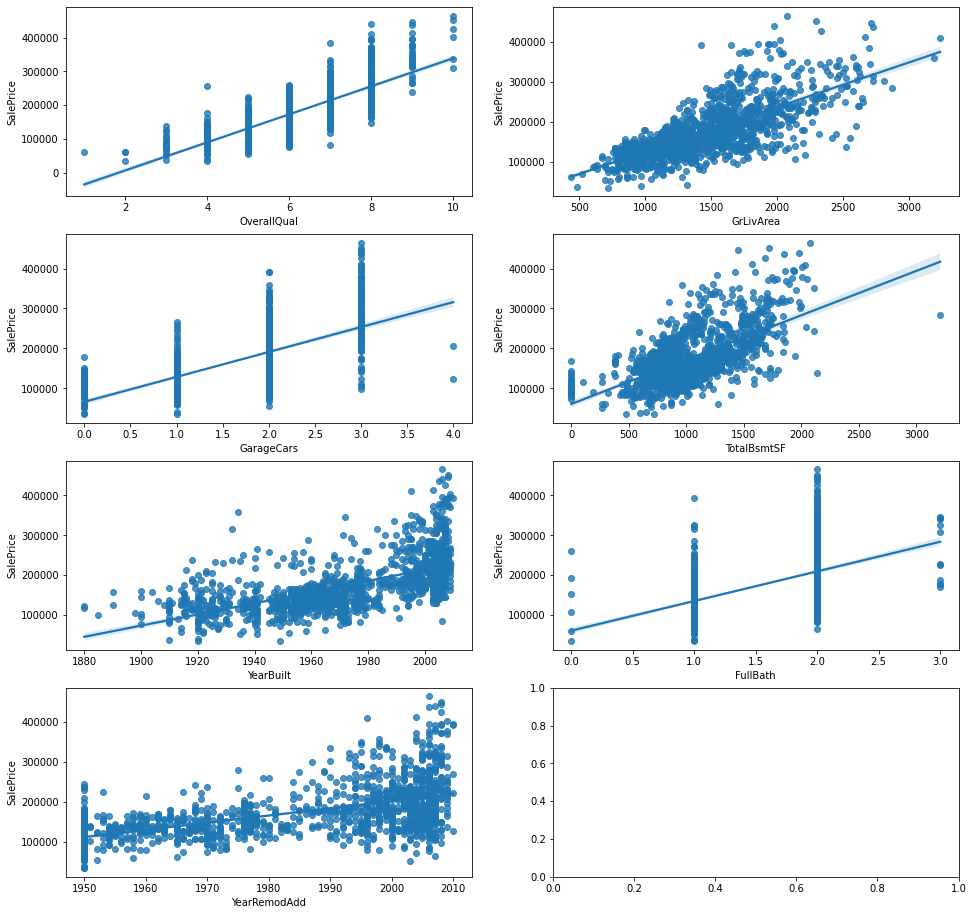

In [132]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2, figsize = (16,16))

for i, j in zip(cols.drop(['SalePrice']), [ax1, ax2, ax3, ax4, ax5, ax6, ax7]):
    sns.regplot(x = i, y = 'SalePrice', data = data, scatter = True, fit_reg = True, ax = j)

### 명목형 변수 탐색

* SalePrice에 영향을 많이 끼치는 변수 <br>
'MS Zoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', <br> 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 등이 있습니다.

* 최대한 IQR 박스끼리 겹치지 않는 것을 고르는 듯 함

In [34]:
len(cat_feats)

43

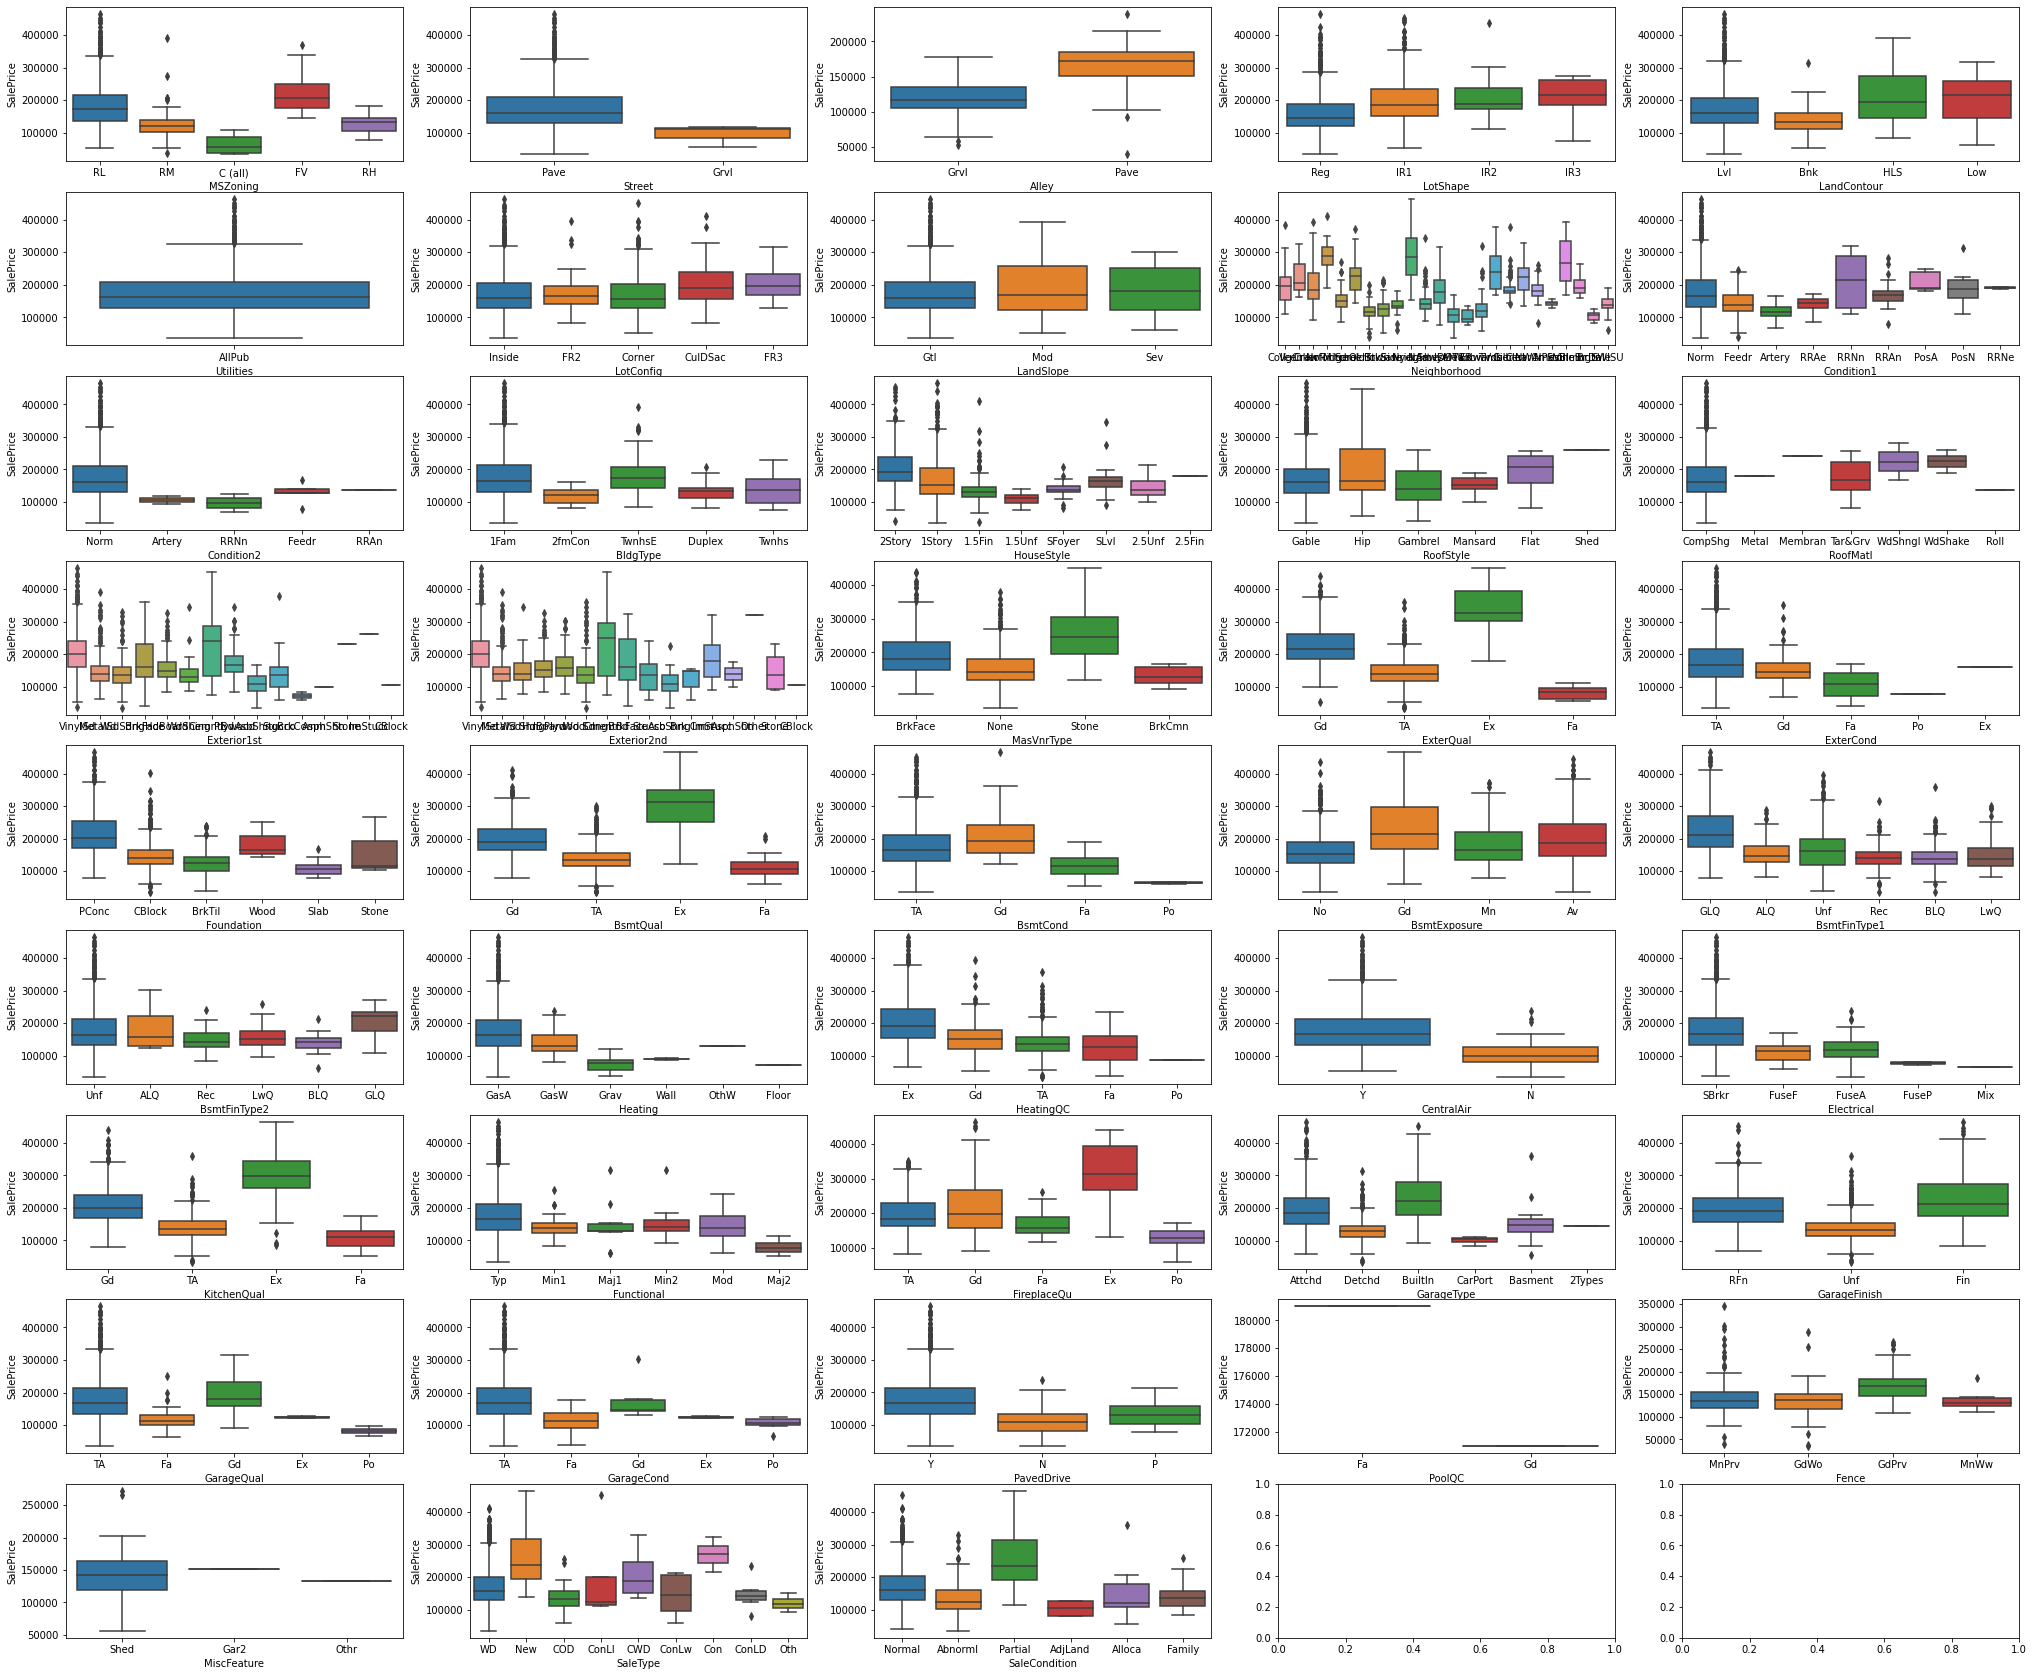

In [36]:
fig, axs = plt.subplots(9, 5, figsize = (7*5, 6*5))

for r in range(9):
    for c in range(5):
        i = r * 5 + c
        if i < len(cat_feats):
            sns.boxplot(x = cat_feats[i], y = 'SalePrice', data = data, ax = axs[r][c])

* SalePrice와 관련이 큰 수치형/명목형 변수

In [37]:
num_st = cols
cat_st = ['MS Zoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

## [3] Feature Engineering

### Log 변환

Skewness:  1.114752540629864
Kurtosis:  1.5097114067448119


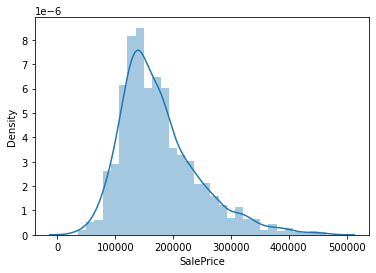

In [53]:
sns.distplot(data['SalePrice'])
print('Skewness: ', data['SalePrice'].skew())
print('Kurtosis: ', data['SalePrice'].kurt())

Skewness:  -0.09559231557200124
Kurtosis:  0.5781980101627213


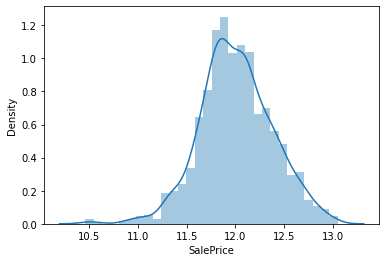

In [54]:
sns.distplot(np.log(data['SalePrice']))
print('Skewness: ', np.log(data['SalePrice']).skew())
print('Kurtosis: ', np.log(data['SalePrice']).kurt())

### 결측 데이터 처리

* 있다/없다의 개념일 뿐 측정되지 않은 데이터가 아님

* 결측값 중 수치형 데이터 <br>
LotFrontage, MasVnrArea, GarageYrBlt, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea, BsmtFullBath, BsmtHalfBath, GarageCars

* MasVnrType (벽돌 유형) <br>
None(775개)과 nan(7개)의 차이를 모르겠음

In [105]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [ ]:
data['MasVnrType']

* SaleType (판매 유형) <br>
Oth(4개)과 nan(1개)의 차이 모르겠음

In [107]:
test['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD',
       nan], dtype=object)

In [108]:
colfn = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MSZoning', 'Utilities', 'Exterior1st',
'Exterior2nd', 'KitchenQual', 'Functional']

for col in colfn:
    data[col].fillna('None', inplace = True)
    test[col].fillna('None', inplace = True)

In [114]:
(data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

LotFrontage     0.173180
GarageYrBlt     0.048276
MasVnrType      0.005364
MasVnrArea      0.005364
KitchenAbvGr    0.000000
                  ...   
ExterCond       0.000000
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
SalePrice       0.000000
Length: 81, dtype: float64